# Old (Dropped) Task Analysis

In [1]:
%matplotlib inline

from os.path import join as pjoin

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from fio import load_fooof_task
from settings import YNG_INDS, YNG_COL, OLD_INDS, OLD_COL

## Settings

In [2]:
# Set path to load results from
res_path = '/Users/tom/Documents/Research/1-Projects/fooof/2-Data/Results/G2'

# Set average function to use
avg_func = np.nanmean
#avg_func = np.nanmedian

srate = 512
tmin, tmax = -0.85, 1.1

### Plot Functions

In [3]:
def plot_alpha_response_compare(canonical_alpha, fooofed_alpha, t_win, srate):
    """Plot the alpha response results.

    Note: both inputs should [n_conds, n_times] matrices.
    """

    # Plot alpha response between different alpha filters
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=[16, 6])
    times = np.arange(t_win[0], t_win[1], 1/srate)

    # Canonical alpha
    ax1.set_title('Canonical Alpha')
    ax1.plot(times, canonical_alpha[0, :], 'b', label='Load-1')
    ax1.plot(times, canonical_alpha[1, :], 'g', label='Load-2')
    ax1.plot(times, canonical_alpha[2, :], 'y', label='Load-3')

    ax2.set_title('FOOOFed Alpha')
    ax2.plot(times, fooofed_alpha[0, :], 'b', label='Load-1')
    ax2.plot(times, fooofed_alpha[1, :], 'g', label='Load-2')
    ax2.plot(times, fooofed_alpha[2, :], 'y', label='Load-3');

    # Restrict x-axis plotting
    ax1.set_xlim([-0.5, 1.0])
    ax2.set_xlim([-0.5, 1.0])

    ax1.legend(); ax2.legend();
    

def plot_task_response(dat, title='', save_fig=False, save_name=None):
    """Plots the response of task."""

    # Set average function to use
    avg_func = np.median

    fig, ax = fig, ax = plt.subplots(figsize=[6, 4])

    base_yng = np.repeat(dat[:, YNG_INDS, 0], 3).reshape(3, len(YNG_INDS), 3)
    base_old = np.repeat(dat[:, OLD_INDS, 0], 3).reshape(3, len(OLD_INDS), 3)

    t_dat_yng = dat[:, YNG_INDS, :] - base_yng
    t_dat_old = dat[:, OLD_INDS, :] - base_old

    avg_dat_yng = avg_func(avg_func(t_dat_yng, 0), 0)
    avg_dat_old = avg_func(avg_func(t_dat_old, 0), 0)

    plt.plot([0, 1, 2], avg_dat_yng, YNG_COL, lw=2.5, label='Yng')
    plt.plot([0, 1, 2], avg_dat_old, OLD_COL, lw=2.5, label='Old')

    plt.title(title + ' Response', fontsize=16, fontweight='bold')

    plt.xticks([0, 1, 2], ['Pre', 'Early', 'Late']);

    # Set tick fontsizes
    plt.setp(ax.get_xticklabels(), fontsize=14, fontweight='bold')
    plt.setp(ax.get_yticklabels(), fontsize=12)

    plt.legend(fontsize=12)

    #_set_lr_spines(ax)
    #_save_fig(save_fig, save_name)

### Filtered Alpha Response - Canonical vs. FOOOFed

_Old analysis - no longer used_

In [4]:
# Load data
#   Note: Data is organized as [n_subjs, n_loads, n_times]
canonical_group = np.load(pjoin(res_path, 'Group', 'canonical_group.npy'))
fooofed_group = np.load(pjoin(res_path, 'Group', 'fooofed_group.npy'))

In [5]:
# Partition group
subset = 'all' # 'young', 'old', 'all'
if subset == 'old':
    canonical_group = canonical_group[0:15, :, :]
    fooofed_group = fooofed_group[0:15, :, :]
if subset == 'young':
    canonical_group = canonical_group[15:, :, :]
    fooofed_group = fooofed_group[15:, :, :]
if subset == 'all':
    canonical_group = canonical_group
    fooofed_group = fooofed_group

In [6]:
# Average across subjects
canonical_group_avg = avg_func(canonical_group, 0)
fooofed_group_avg = avg_func(fooofed_group, 0)

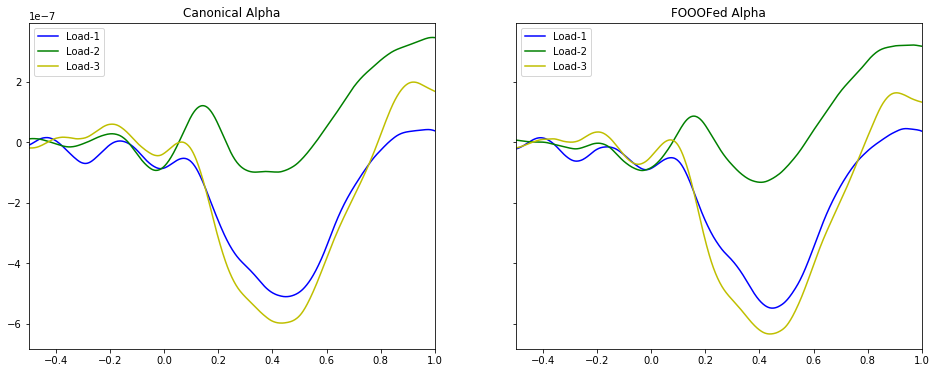

In [7]:
# Plot the alpha response - group average
plot_alpha_response_compare(canonical_group_avg, fooofed_group_avg, [tmin, tmax], srate)

In [8]:
# Plot each individual subject
#for alpha_subj, fooof_subj in zip(canonical_group, fooofed_group):
#    plot_alpha_response_compare(alpha_subj, fooof_subj, [tmin, tmax], srate)

### Quantify Differences

In [9]:
# Grab the time that represent the late time period: 0.8 - 1.0
times = np.arange(tmin, tmax, 1/srate)
late_times = np.array(times >= 0.8) & np.array(times <= 1.0)

In [10]:
# Extract late time period, and average across it
#canonical_group_late = np.mean(canonical_group[:, :, late_times], 2)
#fooofed_group_late = np.mean(fooofed_group[:, :, late_times], 2)

canonical_group_late = np.median(canonical_group[:, :, late_times], 2)
fooofed_group_late = np.median(fooofed_group[:, :, late_times], 2)

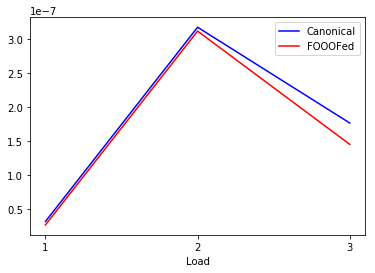

In [11]:
# Plot group average alpha power, per load, in late window, for canonical & fooofed bands
plt.figure()
plt.plot(avg_func(canonical_group_late, 0), 'b', label='Canonical')
plt.plot(avg_func(fooofed_group_late, 0), 'r', label='FOOOFed')
plt.xticks([0, 1, 2], [1, 2, 3]);
plt.xlabel('Load')
plt.legend();

## Plot FOOOF Results Across Times & Loads

In [12]:
# Load FOOOF trial data
all_slopes, all_alphas = load_fooof_task(res_path)

# Replace alpha NaN's with 0
all_alphas[np.isnan(all_alphas)] = 0

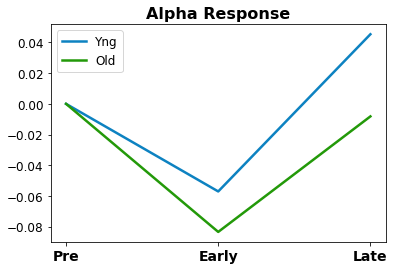

In [13]:
# Plot Alpha response, split up by group, collapsed across load
plot_task_response(all_alphas, 'Alpha')

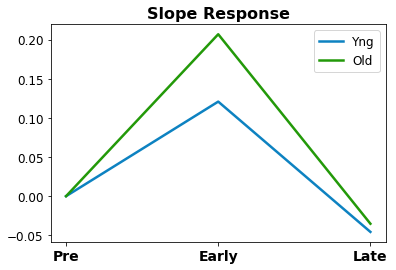

In [14]:
# Plot Slope response, split up by group, collapsed across load
plot_task_response(all_slopes, 'Slope')

In [15]:
# Partition group
subset = 'old' # 'all', 'yng', 'old'

if subset == 'old': 
    s_inds = OLD_INDS
if subset == 'yng':
    s_inds = YNG_INDS
if subset == 'all':
    s_inds = range(0, 31)

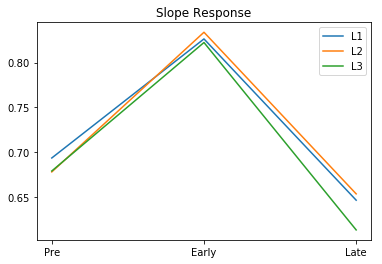

In [16]:
# Plot slope average response - split up by load
plt.figure()
for l_ind in range(3):
    plt.plot(avg_func(all_slopes[l_ind, s_inds, :], 0), label='L' + str(l_ind + 1))
plt.title('Slope Response')
plt.xticks([0, 1, 2], ['Pre', 'Early', 'Late']);
plt.legend();

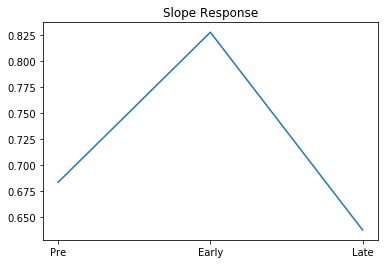

In [17]:
# Plot slope average response - collapsed across loads
plt.figure()
plt.plot(avg_func(avg_func(all_slopes[:, s_inds, :], 0), 0))
plt.title('Slope Response')
plt.xticks([0, 1, 2], ['Pre', 'Early', 'Late']);
#plt.legend();

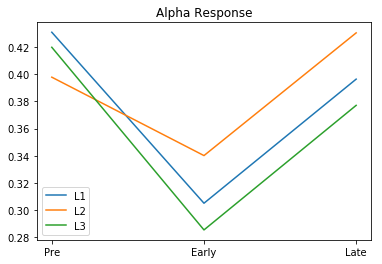

In [18]:
# Plot alpha average response - split up by load
plt.figure()
for l_ind in range(3):
    plt.plot(avg_func(all_alphas[l_ind, s_inds, :], 0), label='L' + str(l_ind + 1))
plt.title('Alpha Response')
plt.xticks([0, 1, 2], ['Pre', 'Early', 'Late']);
plt.legend();

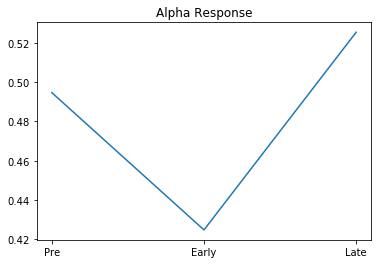

In [19]:
# Plot alpha average response - collapsed across loads
plt.figure()
plt.plot(avg_func(avg_func(all_alphas, 0), 0))
plt.title('Alpha Response')
plt.xticks([0, 1, 2], ['Pre', 'Early', 'Late']);

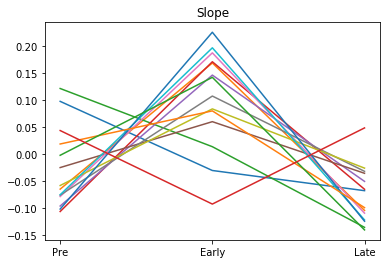

In [20]:
# Plot slope responses for all subjects

trial_type_ind = 0

plt.figure()
for dat in all_slopes[trial_type_ind, s_inds, :]:
    #plt.plot(dat)
    plt.plot(dat - np.mean(dat))
plt.xticks([0, 1, 2], ['Pre', 'Early', 'Late']);
plt.title('Slope');

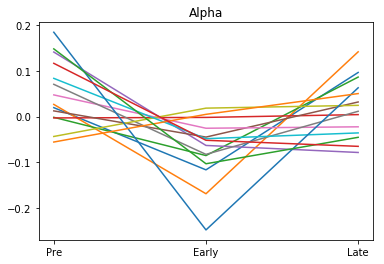

In [21]:
trial_type_ind = 0

plt.figure()
for dat in all_alphas[trial_type_ind, s_inds, :]:
    #plt.plot(dat)
    plt.plot(dat - np.mean(dat))
plt.xticks([0, 1, 2], ['Pre', 'Early', 'Late']);
plt.title('Alpha');

In [22]:
# Check the correlation between alpha & slope responses
pearsonr(all_alphas[0, :, 1] - all_alphas[0, :, 0], all_slopes[0, :, 1] - all_slopes[0, :, 0])

(-0.0815389178388624, 0.6627928329176406)

## Behavioural Correlations With Baseline FOOOF Measures

Note: copied in - not set up to run properly from here. 

In [ ]:
behav_meas = "d'"
#behav_meas = "CDA"
for meas, label in zip([offs, sls, alphas[:, 0], alphas[:, 1], alphas[:, 2]],
                       ['Offset', 'Slope', 'CF', 'Amp', 'BW']):
    
    print('\n'+label)
    print_stat('\tAll', *pearsonr(avg_behav[behav_meas], np.hstack([meas[YNG_INDS], meas[OLD_INDS]])))
    print_stat('\tYng', *pearsonr(avg_behav[avg_behav['Age'] == 1][behav_meas], meas[YNG_INDS]))
    print_stat('\tOld', *pearsonr(avg_behav[avg_behav['Age'] == 2][behav_meas], meas[OLD_INDS]))

In [ ]:
# Plot the correlation between slope and d', in old group
plt.plot(avg_behav[avg_behav['Age'] == 2]["d'"], sls[OLD_INDS], '.')
plt.xlabel("d'")
plt.ylabel("Slope")

In [ ]:
## Check Behaviour & Trial EPhys Corrs - Baseline Measures

In [ ]:
# # Predict behaviour from 'absolute' FOOOF trial output measures
# #   Note: as defined this model has three measures per subject, one for each load

# # Settings
# t_ind = 0

# # Build the dataframe
# df = pd.DataFrame()
# df['exponent'] = all_exps[:, :, t_ind].flatten()

# #df['alpha'] = all_alphas[:, :, t_ind].flatten()
# df['alpha'] = canalpha[:, :, t_ind].flatten()

# df['behav'] = behav_dat["d'"].values
# df['age'] = behav_dat['Age'].values

# # Specify the model
# #outcome, predictors = patsy.dmatrices("behav ~ exponent + alpha + age", df)
# #outcome, predictors = patsy.dmatrices("behav ~ exponent * alpha * age", df)
# outcome, predictors = patsy.dmatrices("behav ~ age + alpha + exponent + alpha:age + exponent:age", df)
# mod = sm.OLS(outcome, predictors)
# res = mod.fit()

# # Check out the results
# print(res.summary())

In [ ]:
# # Predict behaviour from 'absolute' FOOOF trial output measures, separately for each load

# # Settings
# t_ind = 2
# l_ind = 2

# # Build the dataframe
# df = pd.DataFrame()
# df['exponent'] = all_exps[l_ind, :, t_ind].flatten()
# df['alpha'] = all_alphas[l_ind, :, t_ind].flatten()

# df['behav'] = behav_dat[behav_dat['Load'] == l_ind+1]["d'"].values
# df['age'] = behav_dat[behav_dat['Load'] == l_ind+1]["Age"].values

# # Specift the model
# #outcome, predictors = patsy.dmatrices("behav ~ exponent + age", df)
# outcome, predictors = patsy.dmatrices("behav ~ exponent + alpha + age", df)
# #outcome, predictors = patsy.dmatrices("behav ~ exponent * alpha * age", df)
# #outcome, predictors = patsy.dmatrices("behav ~ age + alpha + exponent + alpha:age + exponent:age", df)
# mod = sm.OLS(outcome, predictors)
# res = mod.fit()

# # Check out the results
# #print(res.summary())

In [ ]:
# # Predict from absolute FOOOF results, split up by group

# # Settings
# #group = 'young' # 'young', 'old'
# group = 'old' 
# t_ind = 2

# inds = YNG_INDS if group == 'young' else OLD_INDS
# age_gr = 1 if group == 'young' else 2

# # Build the dataframe
# df = pd.DataFrame()
# df['exponent'] = all_exps[:, inds, t_ind].flatten()

# df['alpha'] = all_alphas[:, inds, t_ind].flatten()
# #df['alpha'] = canalpha[:, inds, t_ind].flatten()

# df['behav'] = behav_dat[behav_dat.Age == age_gr]["d'"].values

# # 
# outcome, predictors = patsy.dmatrices("behav ~ exponent * alpha", df)
# mod = sm.OLS(outcome, predictors)
# res = mod.fit()

# # Check out the results
# print(res.summary())

In [ ]:
# # Check relation between exponent and alpha
# print(pearsonr(df.exponent, df.alpha))
# #plt.plot(df.exponent, df.alpha, '.')

# print(pearsonr(df.behav, df.alpha))
# #plt.plot(df.behav, df.alpha, '.')

# print(pearsonr(df.behav, df.exponent))
# plt.plot(df.behav, df.exponent, '.')

In [ ]:
# Replace NaN with row mean
# import numpy.ma as ma
# out = []
# for mat in all_alphas:
#     mat = mat.T
#     out.append(np.where(np.isnan(mat), ma.array(mat, mask=np.isnan(mat)).mean(axis=0), mat).T)
# all_alphas = np.stack(out)

# Replace nan with global mean
#all_alphas[np.isnan(all_alphas)] = np.nanmean(all_alphas)

In [ ]:
# Abstract example of the data selection approach taken
d1 = {'a' : 1, 'b' : 2}; d2 = {'a' : 3, 'b' : 4}
lambda_dict = {
    'x' : lambda key : {d1[key]},
    'y' : lambda key : {d2[key]}
}
print(lambda_dict['x']('a'))
print(lambda_dict['y']('b'))